In [ ]:
%pip install jieba
%pip install opencc-python-reimplemented
%pip install wordcloud
%pip install matplotlib

In [28]:
import jieba
import codecs
import opencc
from collections import Counter

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def get_words(text, common=10):
    seg_list = jieba.cut(text)
    c = Counter()
    for x in seg_list:
        if len(x)>1 and x != '\r\n':
            c[x] += 1
    c = c.most_common(common)
    return c

if __name__ == '__main__':
    with codecs.open('./contents/lisa-taipei-tour.txt', 'r', encoding='utf8') as file:
        text = file.read()
    
    print('繁體')
    text_seg = get_words(text)
    for word, count in text_seg:
        print(word, count)
    
    print('-----------------------')
    
    # 簡體
    print('簡體')
    cc = opencc.OpenCC('t2s')
    s_text = cc.convert(text)
    s_text_seg = get_words(s_text)
    for word, count in s_text_seg:
        print(word, count)

繁體
LiSA 6
體育館 5
售票 4
開唱 4
大家 4
歌曲 3
宣布 3
這次 3
期待 3
日前 2
-----------------------
簡體
LiSA 6
体育馆 5
售票 4
开唱 4
大学 4
大家 4
票价 3
歌曲 3
宣布 3
来台 3


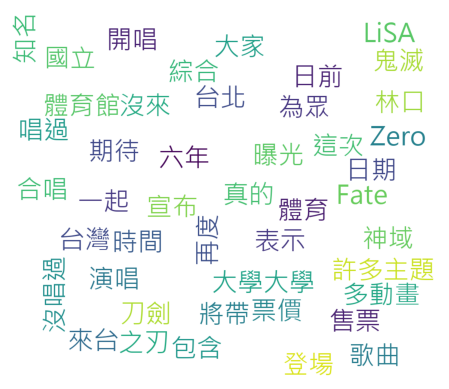

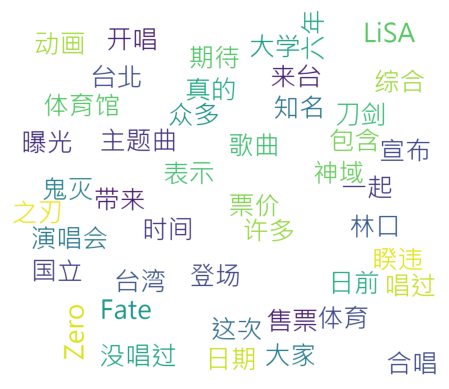

In [24]:
import jieba
import codecs
import opencc
from collections import Counter

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def get_words(text, common=50):
    seg_list = jieba.cut(text)
    c = Counter()
    for x in seg_list:
        if len(x)>1 and x != '\r\n':
            c[x] += 1
    c = c.most_common(common)
    return c

def gen_wordcloud(text):
    wc = WordCloud(font_path='./fonts/msjh.ttc', background_color='white', max_words=2000, max_font_size=60, random_state=42, width=1000, height=860, margin=2,).generate(text)
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

if __name__ == '__main__':
    with codecs.open('./contents/lisa-taipei-tour.txt', 'r', encoding='utf8') as file:
        text = file.read()
    text_seg = get_words(text)
    text_seg_str = ' '.join([k for k, v in text_seg])
    gen_wordcloud(text_seg_str)
    
    # 簡體
    cc = opencc.OpenCC('t2s')
    s_text = cc.convert(text)
    s_text_seg = get_words(s_text)
    s_text_seg_str = ' '.join([k for k, v in s_text_seg])
    gen_wordcloud(s_text_seg_str)

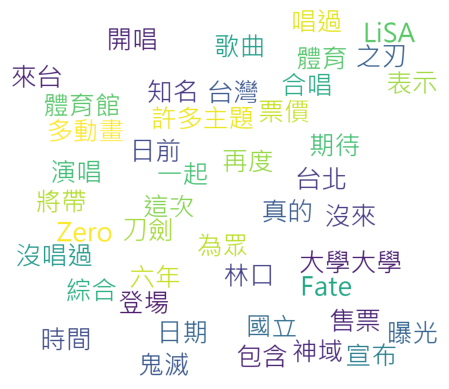

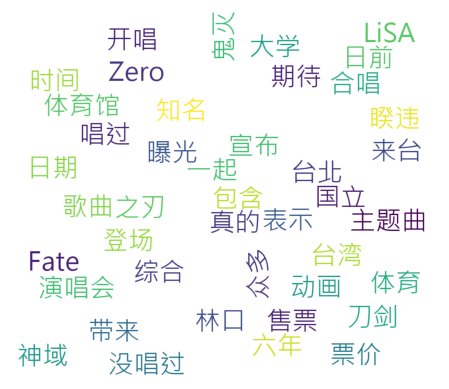

In [23]:
import jieba
import codecs
import opencc
from collections import Counter

from wordcloud import WordCloud
import matplotlib.pyplot as plt

with open('./contents/cn_stopwords.txt', 'r', encoding='utf8') as file:
    CN_STOPWORDS = set(file.read().split('\n'))
with open('./contents/hit_stopwords.txt', 'r', encoding='utf8') as file:
    HITS_STOPWORDS = set(file.read().split('\n'))
with open('./contents/scu_stopwords.txt', 'r', encoding='utf8') as file:
    SCU_STOPWORDS = set(file.read().split('\n'))
STOPWORDS = CN_STOPWORDS | HITS_STOPWORDS | SCU_STOPWORDS

def get_words(text, common=50):
    seg_list = jieba.cut(text)
    c = Counter()
    for x in seg_list:
        if len(x)>1 and x != '\r\n':
            c[x] += 1
    c = c.most_common(common)
    return c

def gen_wordcloud(text):
    wc = WordCloud(font_path='./fonts/msjh.ttc', background_color='white', max_words=2000, stopwords=STOPWORDS, max_font_size=60, random_state=42, width=1000, height=860, margin=2,).generate(text)
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

if __name__ == '__main__':
    with codecs.open('./contents/lisa-taipei-tour.txt', 'r', encoding='utf8') as file:
        text = file.read()
    text_seg = get_words(text)
    text_seg_str = ' '.join([k for k, v in text_seg])
    gen_wordcloud(text_seg_str)
    
    # 簡體
    cc = opencc.OpenCC('t2s')
    s_text = cc.convert(text)
    s_text_seg = get_words(s_text)
    s_text_seg_str = ' '.join([k for k, v in s_text_seg])
    gen_wordcloud(s_text_seg_str)